<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/Diferencias_Progresivas_uwu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuacion del calor 1D con diferencias finitas


Objetivo general:
- Resolver u_t = u_xx en 0<x<1.
- Condiciones: u(0,t)=0, u(1,t)=0, u(x,0)=sen(pi*x).
- Comparar en t=0.5 contra u(x,t)=exp(-pi^2*t)*sen(pi*x).
- Probar h=0.1 y dos k: 0.0005 (estable) y 0.01 (inestable para este esquema).

1) Que es FTCS y por que
- Forward Time: avanzo en tiempo con Euler hacia adelante.
- Centered Space: la segunda derivada en x se aproxima con diferencia centrada.
Condicion de estabilidad: r = k/h^2 <= 1/2 para la ecuacion del calor.

2) Parametros de trabajo

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

h = 0.1
T = 0.5
k_list = [0.0005, 0.01]

3) Malla en x

In [20]:
x = np.arange(0.0, 1.0 + h/2.0, h)
N = len(x)

4) Funcion FTCS

In [82]:
def correr_ftcs(h, k, T, x):
    r = k / (h**2)
    pasos = int(round(T / k))
    w = np.zeros_like(x)
    for i in range(len(x)):
        w[i] = np.sin(np.pi * x[i])  # condicion inicial
    w[0] = 0.0; w[-1] = 0.0         # fronteras
    for n in range(pasos):
        w_nuevo = w.copy()
        for i in range(1, len(x)-1):
            w_nuevo[i] = w[i] + r*(w[i+1] - 2.0*w[i] + w[i-1])
        w_nuevo[0] = 0.0; w_nuevo[-1] = 0.0
        w = w_nuevo
    info = {"r": r, "pasos": pasos, "k": k}
    return w, info

5) Ejecutar para dos k y preparar comparacion

In [102]:
resultados = []
for k in [0.0005, 0.01]:
    w, info = correr_ftcs(h, k, T, x)
    resultados.append({"k": k, "w": w, "info": info})

u_exacta = np.exp(-(np.pi**2)*T) * np.sin(np.pi * x)

cols = {"x_i": x, "u(x_i, 0.5)": u_exacta}
for item in resultados:
    k = item["k"]; w = item["w"]; pasos = item["info"]["pasos"]
    cols[f"w_i, pasos={pasos} (k={k})"] = w
    cols[f"|u - w| (k={k})"] = np.abs(u_exacta - w)

import pandas as pd
df = pd.DataFrame(cols)
df.round(10)

,x_i,"u(x_i, 0.5)","w_i, pasos=1000 (k=0.0005)",|u - w| (k=0.0005),"w_i, pasos=50 (k=0.01)",|u - w| (k=0.01)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.002222,0.002287,0.000064,-30266.270026,30266.272248
2,0.2,0.004227,0.004349,0.000122,60588.054981,60588.050754
3,0.3,0.005818,0.005986,0.000168,-89862.842345,89862.848163
4,0.4,0.006840,0.007037,0.000197,115225.537917,115225.531077
5,0.5,0.007192,0.007399,0.000207,-132328.392814,132328.400006
6,0.6,0.006840,0.007037,0.000197,136478.815915,136478.809075
7,0.7,0.005818,0.005986,0.000168,-124251.368517,124251.374336
8,0.8,0.004227,0.004349,0.000122,94976.581153,94976.576926
9,0.9,0.002222,0.002287,0.000064,-51519.548023,51519.550245


6) Graficas (una por k)

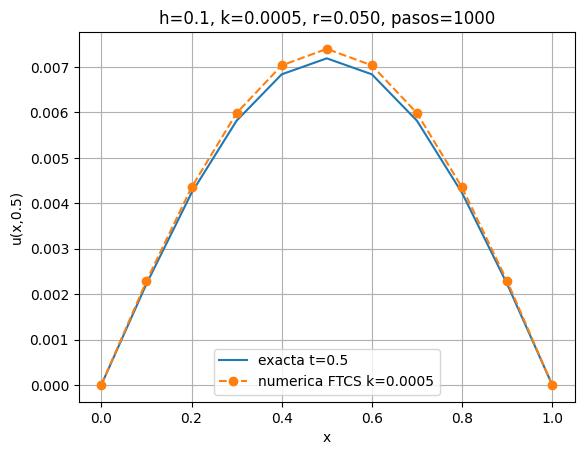

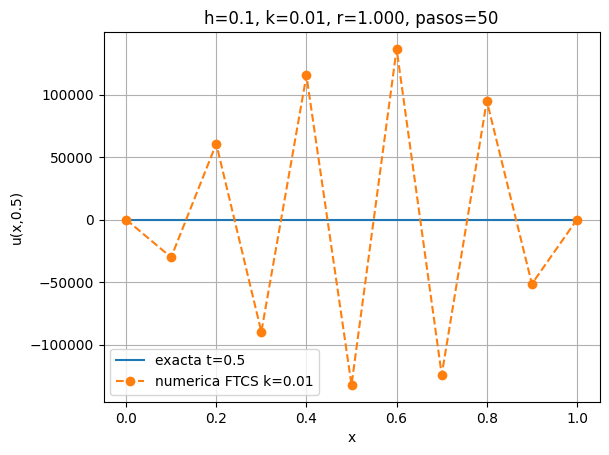

In [112]:
item_estable = [it for it in resultados if abs(it["k"]-0.0005)<1e-12][0]
plt.figure()
plt.plot(x, u_exacta, label="exacta t=0.5")
plt.plot(x, item_estable["w"], marker="o", linestyle="--", label=f"numerica FTCS k={item_estable['k']}")
plt.title(f"h={h}, k={item_estable['k']}, r={item_estable['info']['r']:.3f}, pasos={item_estable['info']['pasos']}")
plt.xlabel("x"); plt.ylabel("u(x,0.5)"); plt.grid(True); plt.legend(); plt.show()

item_inestable = [it for it in resultados if abs(it["k"]-0.01)<1e-12][0]
plt.figure()
plt.plot(x, u_exacta, label="exacta t=0.5")
plt.plot(x, item_inestable["w"], marker="o", linestyle="--", label=f"numerica FTCS k={item_inestable['k']}")
plt.title(f"h={h}, k={item_inestable['k']}, r={item_inestable['info']['r']:.3f}, pasos={item_inestable['info']['pasos']}")
plt.xlabel("x"); plt.ylabel("u(x,0.5)"); plt.grid(True); plt.legend(); plt.show()

- Si r = k/h^2 <= 1/2, FTCS funciona bien para este problema.
- Con h=0.1 y k=0.0005: r=0.05 (bien). Con h=0.1 y k=0.01: r=1 (mal).
- Reducir k y/o h ayuda si se respeta la condicion; si no, la solucion se daña.